In [1]:
import numpy as np
import pandas as pd
import humap
import time

import matplotlib.pyplot as plt
import math
import os

from sklearn.preprocessing import normalize
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_array

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X, _, y, _ = train_test_split(X, y, test_size=0.5, random_state=0)
X = normalize(X)
print(X.shape, y.shape)

(35000, 784) (35000,)


In [3]:
hUmap = humap.HUMAP(np.array([0.2, 0.2]), verbose=True)
hUmap.fit(X, y)

L0 - 35000 data samples.
L0 - Fitting: done in 46.330555 seconds.

L1 - 7000 data samples.
L1 - Selecting Landmarks: done in 0.106748 seconds.
L1 - Constructing Neighborhood: done in 30.891439 seconds.
L1 - Sparse Similarity: done in 0.050694 seconds.
L1 - Fitting: done in 0.103322 seconds.
L1 - Associating data points to landmarks: done in 0.008750 seconds.
L1 - Construction: done in 31.306973

L2 - 1400 data samples.
L2 - Selecting Landmarks: done in 0.011870 seconds.
L2 - Constructing Neighborhood: done in 0.874222 seconds.
L2 - Sparse Similarity: done in 0.010142 seconds.
L2 - Fitting: done in 0.017783 seconds.
L2 - Associating data points to landmarks: done in 0.001541 seconds.
L2 - Construction: done in 0.990622

Hierarchical Representation: done in 78.760750 seconds.


In [4]:
X_2 = X[hUmap.original_indices(2), :]
X_1 = X[hUmap.original_indices(1), :]


# Using 'transform' method to project a hierarchy level

In [5]:
"""
    Projecting the top-level (2)
"""
embedding_2 = hUmap.transform(2)
y_2 = hUmap.labels(2)

Initial low-dimensional representation: done in 0.000558 seconds.

Embedding level 2 with 1400 data samples.
	completed 0/500 epochs
	completed 50/500 epochs
	completed 100/500 epochs
	completed 150/500 epochs
	completed 200/500 epochs
	completed 250/500 epochs
	completed 300/500 epochs
	completed 350/500 epochs
	completed 400/500 epochs
	completed 450/500 epochs
	completed 500 epochs

Embedding: Done in 0.775731 seconds.


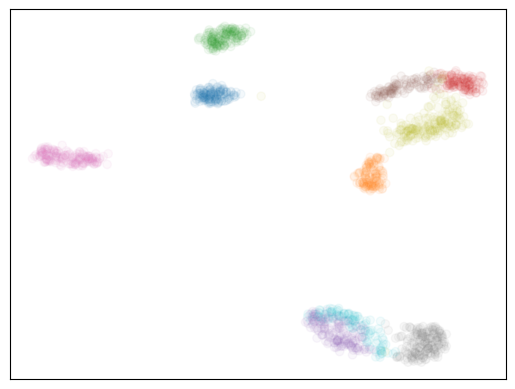

In [6]:
plt.scatter(embedding_2[:, 0], embedding_2[:, 1], c=y_2, alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.show()

In [7]:

hUmap.set_fixing_term(0.01)
hUmap.fix_datapoints(embedding_2)

embedding_1 = hUmap.transform(1)
y_1 = hUmap.labels(1)
embedding_1.shape

Initial low-dimensional representation: done in 0.001554 seconds.

Embedding level 1 with 7000 data samples.
	completed 0/500 epochs
	completed 50/500 epochs
	completed 100/500 epochs
	completed 150/500 epochs
	completed 200/500 epochs
	completed 250/500 epochs
	completed 300/500 epochs
	completed 350/500 epochs
	completed 400/500 epochs
	completed 450/500 epochs
	completed 500 epochs

Embedding: Done in 2.996113 seconds.


(7000, 2)

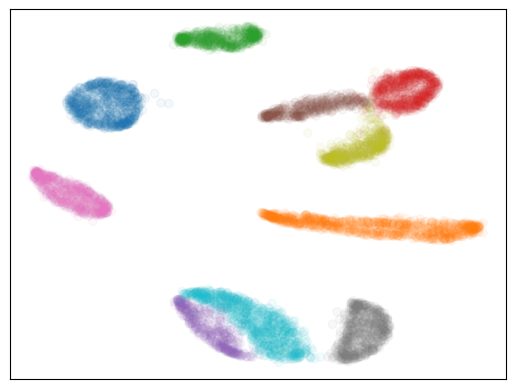

In [8]:
plt.scatter(embedding_1[:, 0], embedding_1[:, 1], c=y_1, alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.show()

In [9]:
hUmap.set_fixing_term(0.01)
hUmap.fix_datapoints(embedding_1)

embedding_0 = hUmap.transform(0)
y_0 = y
embedding_0.shape

Initial low-dimensional representation: done in 0.006637 seconds.

Embedding level 0 with 35000 data samples.
	completed 0/500 epochs
	completed 50/500 epochs
	completed 100/500 epochs
	completed 150/500 epochs
	completed 200/500 epochs
	completed 250/500 epochs
	completed 300/500 epochs
	completed 350/500 epochs
	completed 400/500 epochs
	completed 450/500 epochs
	completed 500 epochs

Embedding: Done in 17.695620 seconds.


(35000, 2)

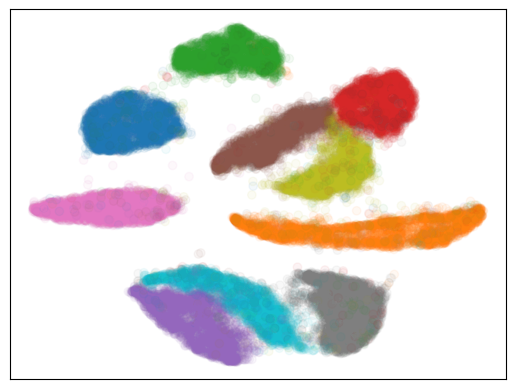

In [10]:
plt.scatter(embedding_0[:, 0], embedding_0[:, 1], c=y_0.astype(int), alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.show()

# Using 'transform' method to project a subset of indices

I will use a clustering to discover indices more easily

In [11]:
from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans(n_clusters=6, random_state=11).fit(embedding_2)
# kmeans = DBSCAN().fit(embedding_2)
kmeans.labels_


array([2, 0, 2, ..., 2, 0, 4], dtype=int32)

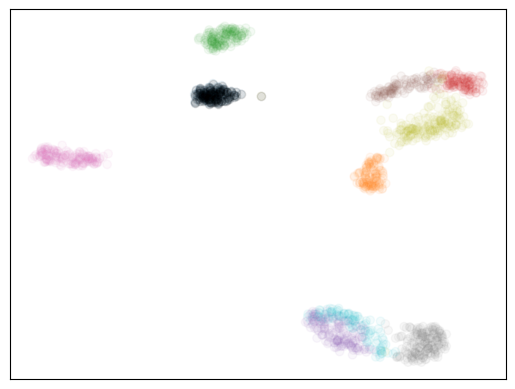

In [12]:
plt.scatter(embedding_2[:, 0], embedding_2[:, 1], c=y_2, alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 

indices_black = np.arange(embedding_2.shape[0])[kmeans.labels_ == 1]

plt.scatter(embedding_2[indices_black, 0], embedding_2[indices_black, 1], c='black', alpha=0.1)

In [13]:
hUmap.set_fixing_term(0.01)

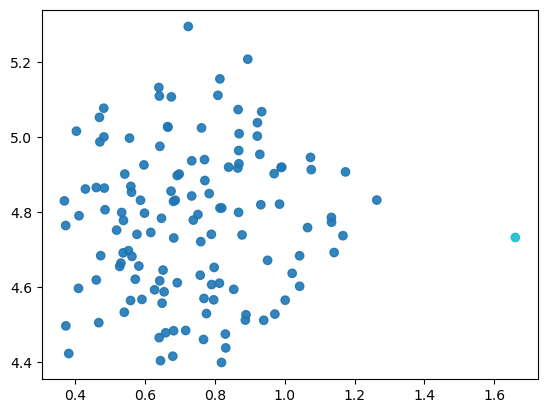

In [14]:
points_before = embedding_2[indices_black]
plt.scatter(points_before[:, 0], points_before[:, 1], c=y_2[indices_black], alpha=0.9, cmap='tab10')

In [16]:
"""
    Use transform method, however, make sure to specify indices=
"""
points = embedding_2[indices_black]
hUmap.fix_datapoints(points)

embedding_cluster1, y_cluster1, indices_cluster1, indices_fixed = hUmap.transform(2, indices=indices_black)
# X_cluster1 = X_1[indices_cluster1]



Performing optimization with 129 fixed data points.
Correspond values has 129/129 indices, from 813 to be projected. 
Initial low-dimensional representation: done in 0.000494 seconds.

Embedding level 1 with 813 data samples.
	completed 0/500 epochs
	completed 50/500 epochs
	completed 100/500 epochs
	completed 150/500 epochs
	completed 200/500 epochs
	completed 250/500 epochs
	completed 300/500 epochs
	completed 350/500 epochs
	completed 400/500 epochs
	completed 450/500 epochs
	completed 500 epochs

Embedding: Done in 0.553221 seconds.


In [17]:
embedding_cluster1.shape, y_cluster1.shape, indices_cluster1.shape

((813, 2), (813,), (813,))

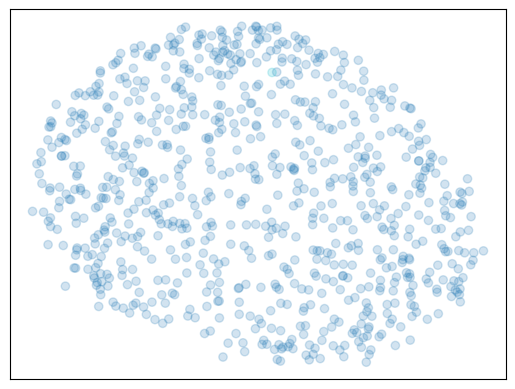

In [18]:
plt.scatter(embedding_cluster1[:, 0], embedding_cluster1[:, 1], c=y_cluster1, alpha=0.2, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
plt.show()

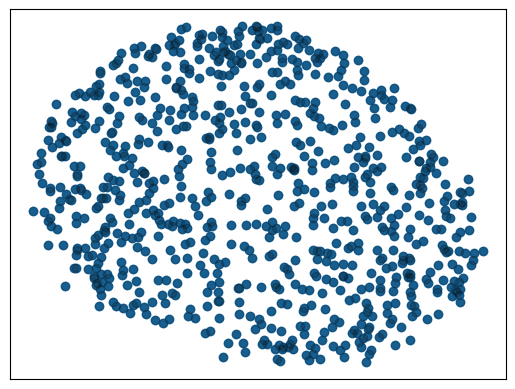

In [19]:
kmeans = KMeans(n_clusters=1, random_state=0).fit(embedding_cluster1)
plt.scatter(embedding_cluster1[:, 0], embedding_cluster1[:, 1])#, c=y_cluster1, alpha=0.1, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 

indices_black = np.arange(embedding_cluster1.shape[0])[kmeans.labels_ == 0]

plt.scatter(embedding_cluster1[indices_black, 0], embedding_cluster1[indices_black, 1], c='black', alpha=0.2)

In [20]:
"""
    Do the same as in the previous example
    
    Here (and for possibly subsequent levels), we have to indices = indices_clusterLevel[indices_black]
    
"""
points = embedding_cluster1[indices_black]
hUmap.fix_datapoints(points)

embedding_cluster2, y_cluster2, indices_cluster2, indices_fixed2 = hUmap.transform(1, indices=indices_cluster1[indices_black])
X_cluster2 = X[indices_cluster2]



Performing optimization with 813 fixed data points.
Correspond values has 813/813 indices, from 3419 to be projected. 
Initial low-dimensional representation: done in 0.000972 seconds.

Embedding level 0 with 3419 data samples.
	completed 0/500 epochs
	completed 50/500 epochs
	completed 100/500 epochs
	completed 150/500 epochs
	completed 200/500 epochs
	completed 250/500 epochs
	completed 300/500 epochs
	completed 350/500 epochs
	completed 400/500 epochs
	completed 450/500 epochs
	completed 500 epochs

Embedding: Done in 1.431064 seconds.


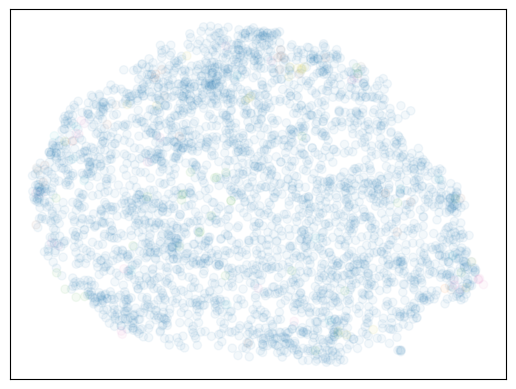

In [21]:
plt.scatter(embedding_cluster2[:, 0], embedding_cluster2[:, 1], c=y_cluster2, alpha=0.05, cmap='tab10')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 

# Using 'transform' method for projecting based on class

In [22]:
"""
    Make sure to set indices=, and class_based=True
"""

embedding_cluster, y_cluster, indices_cluster, indices_fixed = hUmap.transform(2, indices=np.array([4, 9]), class_based=True)
X_cluster = X_1[indices_cluster]

Initial low-dimensional representation: done in 0.000605 seconds.

Embedding level 1 with 1321 data samples.
	completed 0/500 epochs
	completed 50/500 epochs
	completed 100/500 epochs
	completed 150/500 epochs
	completed 200/500 epochs
	completed 250/500 epochs
	completed 300/500 epochs
	completed 350/500 epochs
	completed 400/500 epochs
	completed 450/500 epochs
	completed 500 epochs

Embedding: Done in 0.625532 seconds.


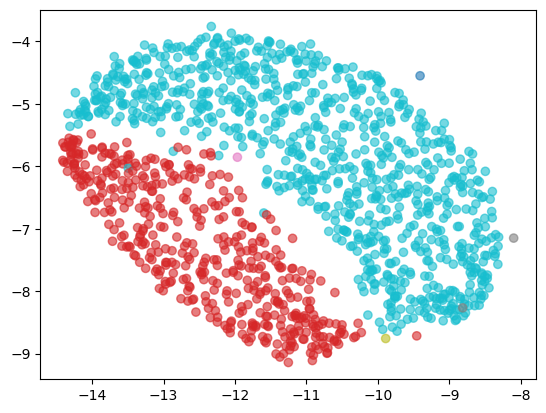

In [38]:
plt.scatter(embedding_cluster[:, 0], embedding_cluster[:, 1], c=y_cluster, alpha=0.6, cmap='tab10')
plt.show()


In [25]:
embedding_cluster0, y_cluster0, indices_cluster0, indices_fixed0 = hUmap.transform(1, indices=np.array([4, 9]), class_based=True)


Initial low-dimensional representation: done in 0.001502 seconds.

Embedding level 0 with 6994 data samples.
	completed 0/500 epochs
	completed 50/500 epochs
	completed 100/500 epochs
	completed 150/500 epochs
	completed 200/500 epochs
	completed 250/500 epochs
	completed 300/500 epochs
	completed 350/500 epochs
	completed 400/500 epochs
	completed 450/500 epochs
	completed 500 epochs

Embedding: Done in 2.719875 seconds.


In [35]:
yy = np.array(y)[indices_cluster0].astype(int)

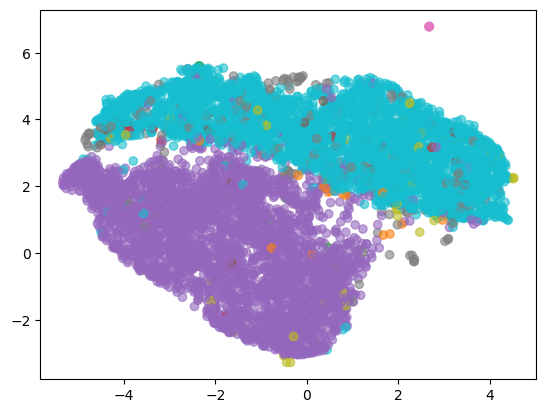

In [37]:
plt.scatter(embedding_cluster0[:, 0], embedding_cluster0[:, 1], c=yy, alpha=0.6, cmap='tab10')
plt.show()

In [ ]:
y